<a href="https://colab.research.google.com/github/MohammedFawazAli/AIML-2025_B15/blob/main/Lab05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [51]:
url = 'https://raw.githubusercontent.com/pandas-dev/pandas/refs/heads/main/doc/data/titanic.csv'
df = pd.read_csv(url)

In [52]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [53]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


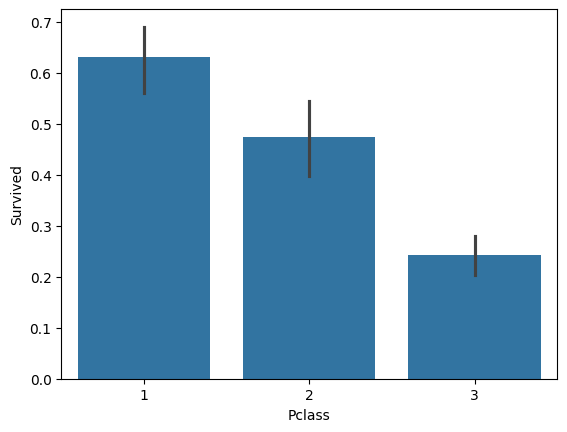

In [54]:
sns.barplot(x='Pclass', y='Survived', data=df)
plt.show()

In [55]:
df['Age'].fillna(df['Age'].median(), inplace=True)  # Impute missing age values
df.drop(columns=['Cabin'], inplace=True)  # Drop irrelevant columns
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)  # Recode categorical features

In [56]:
X = df[['Pclass', 'Age', 'Sex_male', 'Embarked_Q', 'Embarked_S']]  # Features
y = df['Survived']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [58]:
y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

F1 Score: 0.7534246575342465


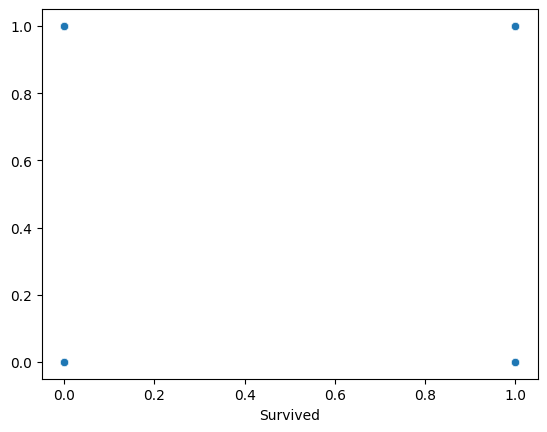

In [59]:
sns.scatterplot(x=y_test, y=y_pred)
plt.show()